In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["font.family"] = "Open Sans"
matplotlib.rcParams["font.size"] = 7


"done"

'done'

In [12]:
# some setup
rmsd_type = "RNA-P"

base_dirs = [ 
    f"../bPTC+peptides/RMSD-{rmsd_type}/",
    f"../bPTC/RMSD-{rmsd_type}/",
]
n_dirs = len(base_dirs)
tids = [1, 2, 3]
n_tids = len(tids)

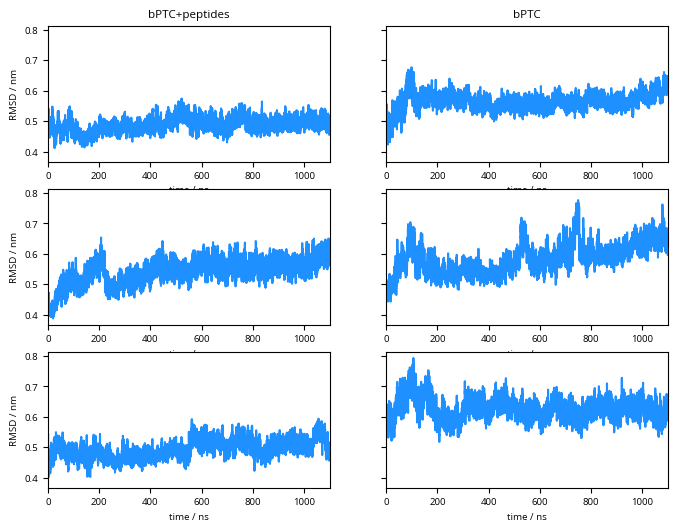

In [13]:
fig, axs = plt.subplots(ncols=n_dirs, nrows=n_tids, figsize=(4*n_dirs, 2*n_tids),
                       sharex=False, sharey=True)

for dir_i in range(n_dirs):
    for tid_i in range(n_tids):

        base_dir = base_dirs[dir_i]
        tid = tids[tid_i]
        ax = axs[tid_i, dir_i]

        # read data
        data = np.loadtxt(base_dir + f"rmsd{tid}.dat").T / 10 # convert to nm
        xs = np.arange(len(data)) / 10 # ns
        
        # plot
        ax.plot(xs, data, color="dodgerblue")
        
        # layout
        if dir_i != 2:
            ax.set_xlim(0,1100)
        else:
            ax.set_xlim(0,3000)
        ax.set_xlabel("time / ns")
        if dir_i == 0:
            ax.set_ylabel("RMSD / nm")
        if tid_i == 0:
            ax.set_title(base_dir.split("/")[1])

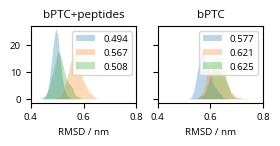

In [17]:
first_frame = 8000
last_frame = 11000

fig, axs = plt.subplots(ncols=n_dirs, nrows=1, figsize=(1.5*n_dirs, 1),
                       sharex=True, sharey=True)

for dir_i in range(n_dirs):
    for tid_i in range(n_tids):

        base_dir = base_dirs[dir_i]
        tid = tids[tid_i]
        ax = axs[dir_i]

        # read data
        data = np.loadtxt(base_dir + f"rmsd{tid}.dat").T / 10
        data_sel = data[first_frame:last_frame]
        mean = np.mean(data_sel)
        hist, edges = np.histogram(data_sel, density=True, range=(0.4, 0.8), bins=50)
        
        # plot
        ax.fill_between(edges[1:], hist, alpha=0.3, 
                        label=f"{mean:.3f}")
        
        # layout
        ax.set_title(base_dir.split("/")[1])
        ax.set_xlabel("RMSD / nm")
        ax.legend()

    ax.set_xlim(0.4,0.8)
for ext in "pdf png".split():
    out_name = f"../rmsd.from{first_frame}.to{last_frame}.{ext}"
    plt.savefig(out_name, dpi=300)